### Importing the neccesesary libraries
- **Pandas** - for manipulating the dataframe
- **Numpy** - for a faster computing upon the data 
- **Matplotlib** - for displaying graphs
- **Sklearn** - for Machine Learning

The last variable I used it for changing the values from the dataframe

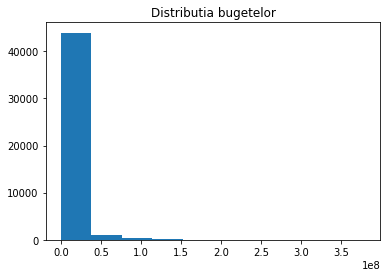

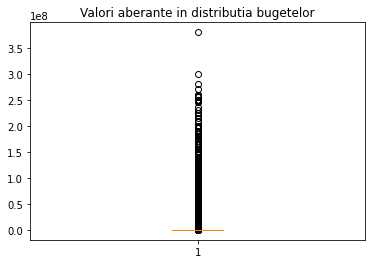

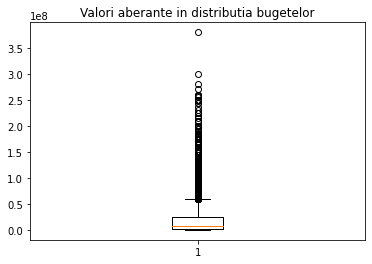

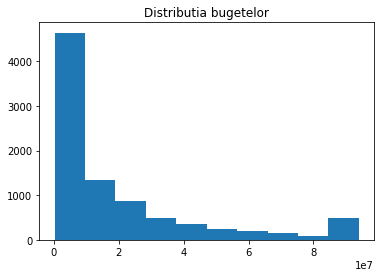

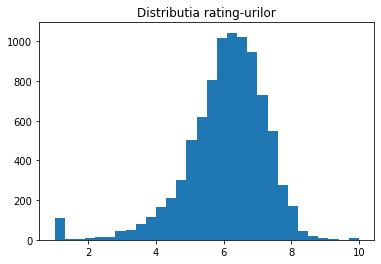

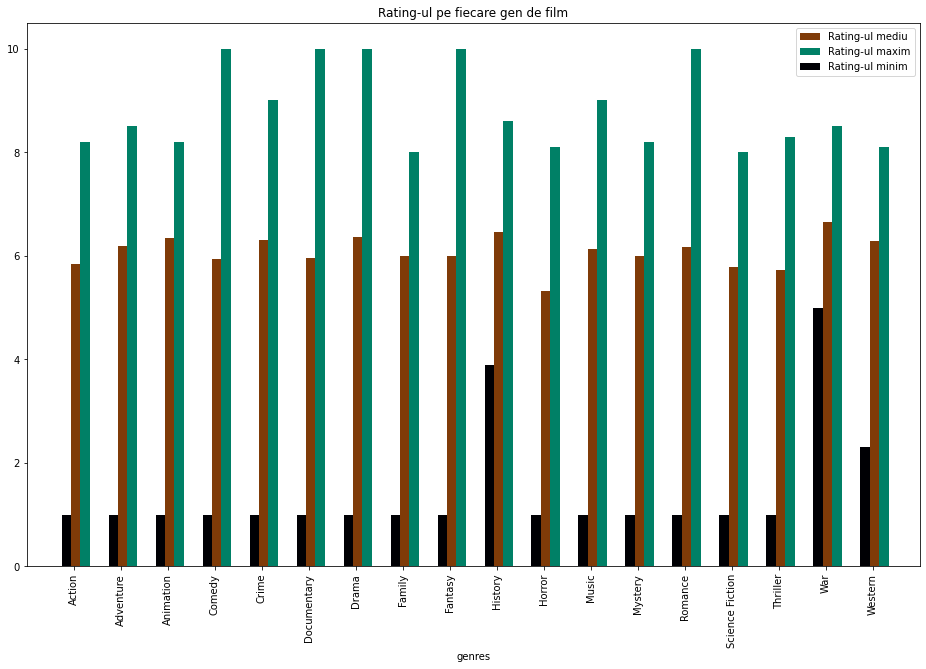

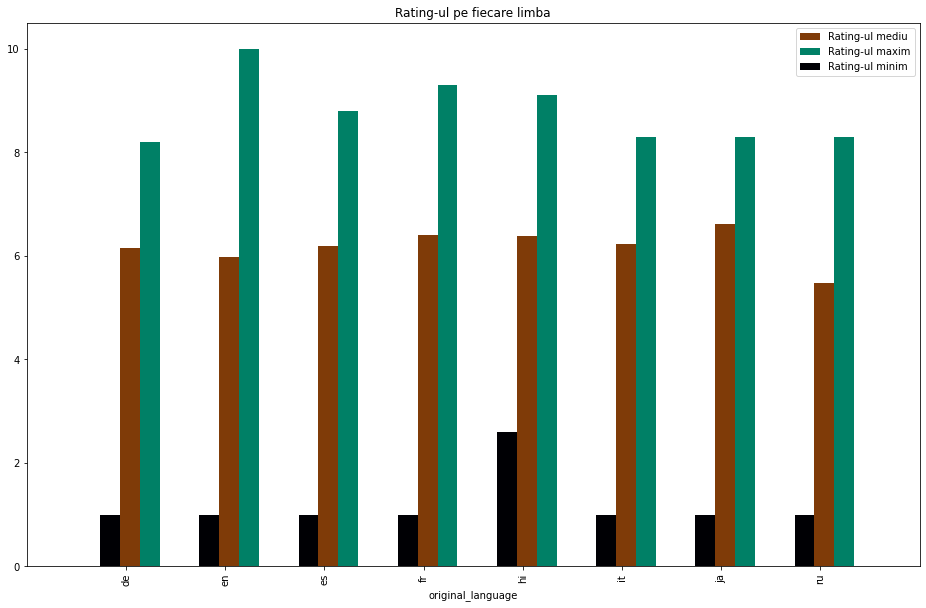

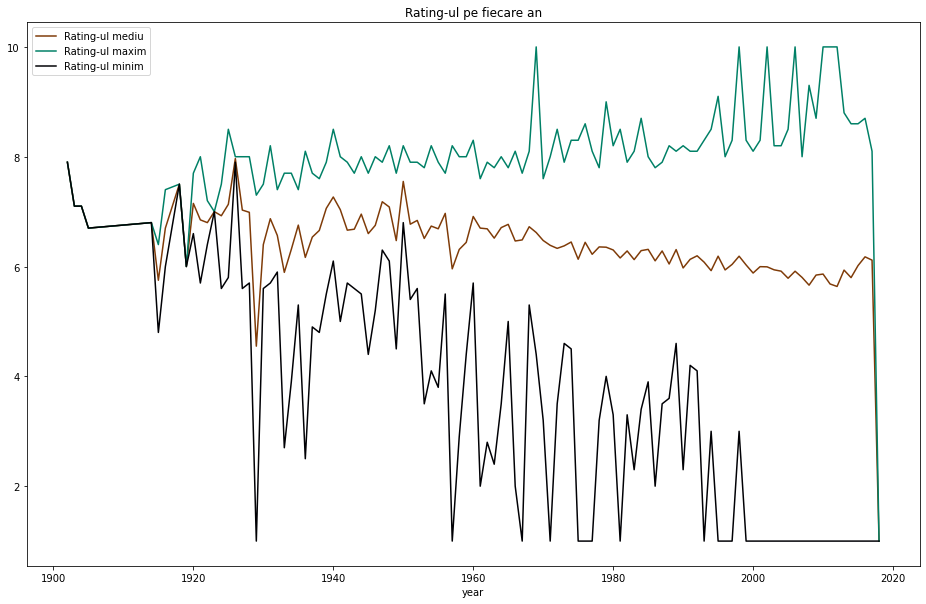

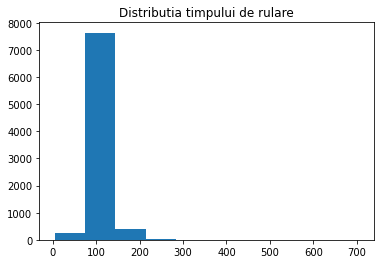

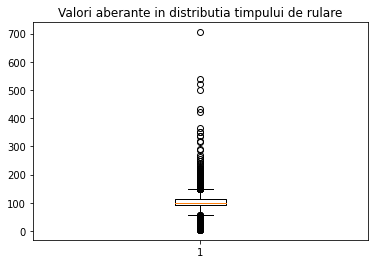

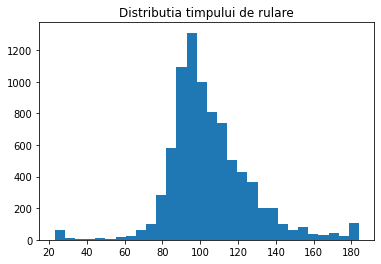

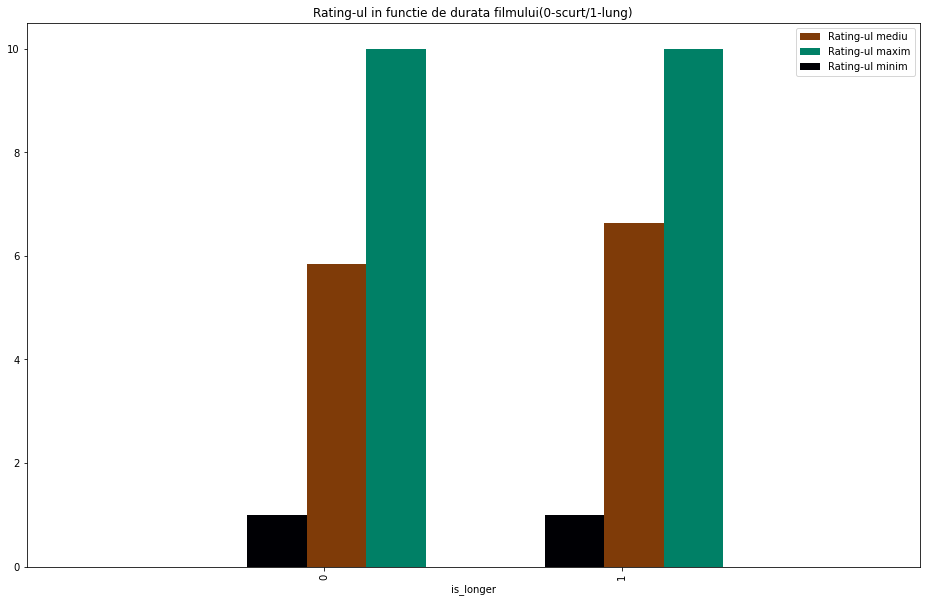

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1370 to 36180
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating           600 non-null    float64
 1   budget           600 non-null    int64  
 2   Action           600 non-null    uint8  
 3   Adventure        600 non-null    uint8  
 4   Animation        600 non-null    uint8  
 5   Comedy           600 non-null    uint8  
 6   Crime            600 non-null    uint8  
 7   Documentary      600 non-null    uint8  
 8   Drama            600 non-null    uint8  
 9   Family           600 non-null    uint8  
 10  Fantasy          600 non-null    uint8  
 11  History          600 non-null    uint8  
 12  Horror           600 non-null    uint8  
 13  Music            600 non-null    uint8  
 14  Mystery          600 non-null    uint8  
 15  Romance          600 non-null    uint8  
 16  Science Fiction  600 non-null    uint8  
 17  Thriller   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from ipynb.fs.full.KNN import *

pd.options.mode.chained_assignment = None

### Importing the Dataframe I used
The dataframe belongs to a bigger dataframe, which is called "Movies", and can be found it [here](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv)

In [2]:
movies = pd.read_csv("C:/Users/bratu/PycharmProjects/pythonProject/movies_metadata.csv", low_memory=False)

### The inspection of the first rows
Structura de date este formata din linii si coloane, unde fiecare linie reprezinta un film, iar fiecare coloana reprezinta
caracteristicile acelui film, cum ar fi:
The dataframe is compound from rows and columns, where the rows represents one movie at a time, and the columns represents the features of each movie, such as:
- if that movie is "R" rated or not,
- the budget of the movie, 
- the release date of the movie etc.

In [3]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### The inspection of the columns and rows, for seeing the data type of every columns, and if we have nan values.

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Din cate se poate observa, avem foarte multe valori lipsa in coloanele **belongs_to_collection**, **homepage**, dar si in **tagline**.

### The inspection of some statistics, for making an idea about how the data look like

In [5]:
movies.describe(include="all")

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
count,45466,4494,45466,45466,7782,45466,45449,45455,45466,44512,...,45379,4.546000e+04,45203.000000,45460,45379,20412,45460,45460,45460.000000,45460.000000
unique,5,1698,1226,4069,7673,45436,45417,92,43373,44307,...,17336,NaN,NaN,1931,6,20283,42277,2,NaN,NaN
top,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,141971,tt1180333,en,Hamlet,No overview found.,...,2008-01-01,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella,False,NaN,NaN
freq,45454,29,36573,5000,12,3,3,32269,8,133,...,136,NaN,NaN,22395,45014,7,11,45367,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.120935e+07,94.128199,NaN,NaN,NaN,NaN,NaN,5.618207,109.897338
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.433225e+07,38.407810,NaN,NaN,NaN,NaN,NaN,1.924216,491.310374
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,85.000000,NaN,NaN,NaN,NaN,NaN,5.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,95.000000,NaN,NaN,NaN,NaN,NaN,6.000000,10.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,107.000000,NaN,NaN,NaN,NaN,NaN,6.800000,34.000000


The object type columns have **NaN** displayed in the last 6 statistics values, which is normal, because we can't compute the mean, or the distribution of an *object*. But we also have **NaN** values upon **budget** column, because its type is also *object*, but normally it must be *int* or *float*. This can be considerated an **outlier**. And from this table, we can see that maximum value of **runtime** and **vote_counts** columns is very high, which can indicate to us that we can have **outliers** here too.

### The purpose of this analyse
The purpose of analysing this dataframe is to create a machine learning model, that predicts the revenue of a movie, relying on the columns we have.

### Data Cleaning process
In this process we'll take each column, which we'll perform the next steps on:
- cleaning the data
- exploring the data
- transforming the data

In practica, nu putem trata distinct acesti 3 pasi. Ei se combina pentru ca la final sa rezulte o structura de date calitativ superioara. Ei se aplica pe rand si ciclic, pana ce vom obtine rezultatul asteptat.
In practice, we can't treat differently these 3 steps. They combine, for at the end to result a superior quality dataframe. They apply cyclically and each at a time, until we get the expecting result.

### The *budget* column
We are starting the process of Data Cleaning by analysing the *budget* column, because we'll need it when we'll analyse the *revenue* column. Then, I will use the both columns to analyse the rest of the columns.

In [6]:
movies["budget"]

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45466, dtype: object

From what we can see, the type of this column is *object*, which doesn't help us at all on our analyse, and we have to convert all the values to *int*.

In [7]:
is_number = 0
is_not_number = 1
list1 = []
for movie in movies["budget"]:
    if movie.isnumeric():
        is_number += 1
    else:
        is_not_number += 1

print(is_not_number)

4


By running the above code, I've found that we have values that aren't numerical (are some sort of links to some images), which we have to replace them. The replacing will be made with one of the values that appears most often, and, at the same time, we'll convert all the values to * int *.

In [8]:
movies["budget"].value_counts(normalize=True)

0           0.804403
5000000     0.006290
10000000    0.005697
20000000    0.005345
2000000     0.005323
              ...   
923         0.000022
72500000    0.000022
2160000     0.000022
4439832     0.000022
1254040     0.000022
Name: budget, Length: 1226, dtype: float64

In [9]:
movies["budget"] = movies.budget.apply(lambda row: int(row) if row.isnumeric() else 2000000)

Further, according to the statistics found above about *budget* column, we can see that we have a lot of *0* values, but, at the same time, we can also see that we have values that are very low(such as 923), which we have to replace or delete them. I proposed that the minimum *budget* to be *200000* dollars, and the rows that have lower values than this one to get removed, because, if we don't do this, these *0* values will have a high impact upon the machine learning model.

In [10]:
movies = movies[movies["budget"] >= 200000]

Next, we can plot a histogram, to see the distribution of the values from *budget* column.

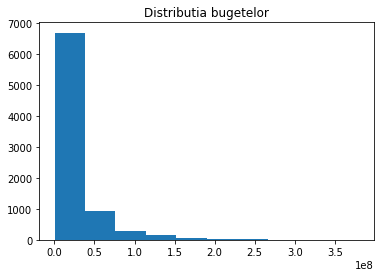

In [11]:
plt.hist(movies['budget'])
plt.title("The distribution of the budgets")
plt.show()
plt.close()

We have a right-skewed distribution, when the most of the values are in the left side. Further, we can plot a *boxplot*, which shows us better if we still have *outliers* in the column.

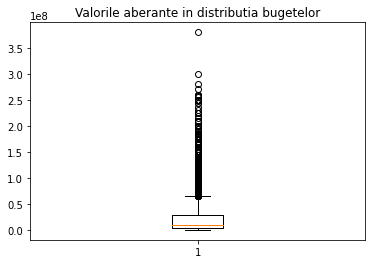

In [12]:
plt.boxplot(movies['budget'])
plt.title("Outliers in the budgets distribution")
plt.show()
plt.close()

We can see that there is a few outliers, but we must deal of them(those distant circles). We'll use the *interquantil range method*, which creates a range where the values are considerated to be normal, and then, we can use the edges of this range to deal with the *outliers*.

In [13]:
q1 = np.percentile(movies["budget"], 25)
q3 = np.percentile(movies["budget"], 75)
iqr = q3 - q1
q_min, q_max =int(q1 - 3*iqr), int(q3 + 3*iqr)

In [14]:
q_min, q_max

(-72000000, 103000000)

The method I've chosen is to replace the values that are outside the range, in the next way:
-the values higher than **q_max** will be replaced with **q_max**
-the values lower than **q_min** will be replaced with **q_min**

In [15]:
movies["budget"] = movies["budget"].clip(q_min, q_max)

And now we can plot a histogram again, to see if the things have improved.

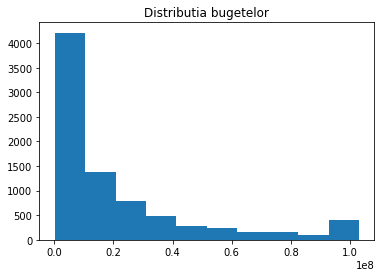

In [16]:
plt.hist(movies['budget'])
plt.title("The distribution of the budgets")
plt.show()
plt.close()

It looks much better now.

### The *revenue* column(the column whose values we want to predict)
Vom continua procesul de **Data Cleaning** prin analizarea coloanei **revenue**, deoarece, cum am zis mai sus, o sa avem nevoie si de ea pentru analizarea celorlalte coloane.
We'll continue the process of **Data Cleaning** by analysing the **revenue** column, because, as I said above, we'll need it too to analyse the rest of the columns.

In [17]:
movies['revenue'].describe()

count    8.187000e+03
mean     5.922203e+07
std      1.413501e+08
min      0.000000e+00
25%      0.000000e+00
50%      6.038942e+06
75%      5.229070e+07
max      2.787965e+09
Name: revenue, dtype: float64

We can see if we have **NaN** values.

In [18]:
movies['revenue'].isnull().sum()

3

Therefore, we have 3 **NaN** values, which we'll replace them with the mean of the values of this column.

In [19]:
revenue_mean = int(np.mean(movies['revenue']))
movies['revenue'] = movies['revenue'].fillna(revenue_mean)
movies['revenue'].isnull().sum()

0

Further, we can consider that the movies that has as revenue the *0* value, it means that those movies made revenue equals with the value of the budget(they didn't make extra profit, they only took out the "investment", representing the *budget*), and we can create a new column, called *new_revenue*, in which we put the budget' value plus the revenue' value(resulting that, if we have a movie with 5000 dollars budget, and the revenue with the same value(5000), it means that movie took out only the budget back, no extra profit).

In [20]:
movies["new_revenue"] = movies["budget"]  + movies["revenue"]

#### The new_revenue column
Now we can continue our analyse upon this new created column. We can plot a histogram to see the distribution of the values.

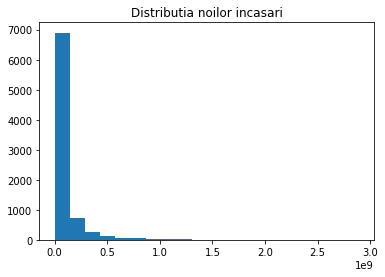

In [21]:
plt.hist(movies['new_revenue'], bins=20)
plt.title("The distribution of the new revenue column")
plt.show()
plt.close()

As I expected, we have here too a right-skewed distribution, looking like the distribution of the *budget* column. We can plot here too a *boxplot*, to see if we have more *outliers*, and if we have, we replace them using the same method as we used upon the budget column.

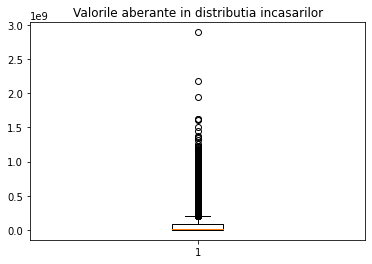

In [22]:
plt.boxplot(movies["new_revenue"])
plt.title("Outliers in the distribution of the new revenue column")
plt.show()
plt.close()

Asadar avem si aici **valori aberante**, chiar putin mai extreme decat am avut in coloana *budget*. Vom folosi iar *intervalul intercuantil*, si vom modifica valorile extreme cu capetele intervalului(q_min si q_max).

In [23]:
q1 = np.percentile(movies["new_revenue"], 25)
q3 = np.percentile(movies["new_revenue"], 75)
iqr = q3 - q1
q_min, q_max =int(q1 - 3*iqr), int(q3 + 3*iqr)

In [20]:
q_min, q_max

(-232417832, 320624299)

In [24]:
movies["new_revenue"] = movies["new_revenue"].clip(q_min, q_max)

Now can plot again a histogram, to see if the distribution has improved.

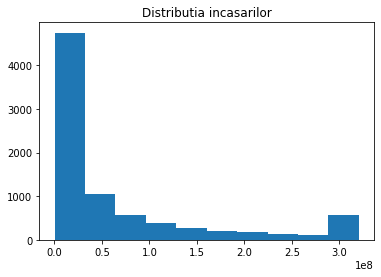

In [25]:
plt.hist(movies["new_revenue"], bins=10)
plt.title("Distributia incasarilor")
plt.show()
plt.close()

It looks very similar with the distribution of the budget column. We can plot a *scatter-plot*, to check if there is some sort of linearity relation between *budget* and *revenue* columns.

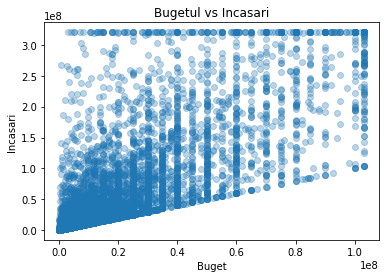

In [26]:
plt.scatter(movies["budget"], movies["new_revenue"], alpha=0.3)
plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()
plt.close()

It looks like there is some sort of linearity between the both columns.

### The creation of a new "*cleaned*" dataframe
Now that we've finished the analyse of this column too, we can put it(along with the budget column, where we'll also add the rest of the columns, after we analysed them, for using in the final machine learning model) into a new dataframe.

In [27]:
movies_cleaned = movies[["new_revenue", "budget"]].copy()
movies_cleaned

,new_revenue,budget
0,320624299.0,30000000
1,320624299.0,65000000
3,97452156.0,16000000
5,247436818.0,60000000
6,58000000.0,58000000
...,...,...
45402,2000000.0,2000000
45408,2000000.0,2000000
45409,2128612.0,800000
45412,3268793.0,2000000


### The *adult* column
Vom continua procesul de **Data Cleaning** prin analizarea urmatoarei coloane(**adult**).
In primul rand, o sa analizam care sunt valorile unice din coloana. Tinand cont ca ar trebui sa avem doar doua valori(*True* si *False*), ar trebui coloana sa fie de tip *binar*.
We continue by analysing the **adult** column. First of all, we'll analyse what the unique values are in this column. Considering that we should have only two values(*True* and *False*), the column should be *binary*.

In [28]:
movies['adult'].unique()

array(['False', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.',
       'True'], dtype=object)

Because we have only 5 different values, the values that aren't *False*, we'll replace with *1*(the equivalent of *True*),  and the rest of them with *0*(The equivalent of *False*), because we need numerical values for the machine learning model, and we'll also rename this column, to make it more descriptive.

In [29]:
movies['adult'] = movies.adult.apply(lambda row: 0 if row == "False" else 1)
movies.rename(columns={"adult": "is_adult"}, inplace=True)

In [30]:
movies['is_adult'].unique()

array([0, 1], dtype=int64)

We can also make a graph, to see the rapport of the *budget / revenue* for each age category of the movies.

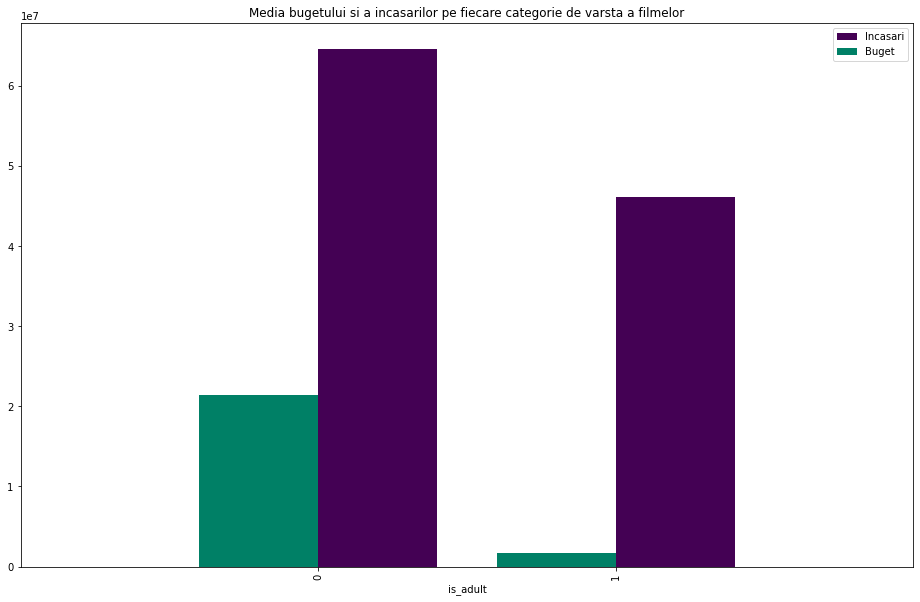

In [31]:
movies.groupby("is_adult").new_revenue.mean().plot(kind="bar", figsize=(16, 10), label="Revenue", width=0.4, colormap="viridis", 
                                             position=0)
movies.groupby("is_adult").budget.mean().plot(kind="bar", figsize=(16, 10), label="Budget", 
                                             title="The mean of the budget and revenue for each age category of the movies", 
                                              position=1.0, width=0.4, colormap="summer")
plt.legend()
plt.xlim(-1, 2)
plt.show()
plt.close()

As we can see, the movies that are under 18 years are more profitable than the movies that are above 18 years, but also the * budget * is a bit high at the movies that are under 18 years (This can be a cause of the fact that we have a few movies above 18 years in our dataframe, which can dramatically influence the graph).

We add this column too to the new *cleaned* dataframe.

In [32]:
movies_cleaned["is_adult"] = movies["is_adult"]
movies_cleaned

,new_revenue,budget,is_adult
0,320624299.0,30000000,0
1,320624299.0,65000000,0
3,97452156.0,16000000,0
5,247436818.0,60000000,0
6,58000000.0,58000000,0
...,...,...,...
45402,2000000.0,2000000,0
45408,2000000.0,2000000,0
45409,2128612.0,800000,0
45412,3268793.0,2000000,0


### The *genres* column
The next column we'll analyse, will be the **genres** column.

In [33]:
movies["genres"]

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
5        [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
6        [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
                               ...                        
45402                       [{'id': 35, 'name': 'Comedy'}]
45408                       [{'id': 35, 'name': 'Comedy'}]
45409    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
45412    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
45422    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
Name: genres, Length: 8190, dtype: object

As it can see, each row has a lot of information that doesn't help us at all. It can also see that each movie has more than 1 genres. And because of that, we'll filter the whole column, and we'll extract only the first genre that appears at each movie, considering that this genre is the main genre.

In [34]:
genres_df = movies["genres"].reset_index()

In [35]:
import ast

genres_list = []

for i in range(len(genres_df["genres"])):
    try:
        genres = ast.literal_eval(genres_df["genres"][i])
        genres_list.append(genres[0]["name"])
    except:
        genres_list.append(genres_list[-1])

In the above code, I extracted the main * genre * of each movie, and I put it into a list, which I will use it later to change the values inside the **genres** column. We've had  a few **outliers** too, that were just some empty lists (so a few movies didn't have *genre*), where as a *genre*, I put the genre of the movie that was before it.

In [36]:
movies["genres"] = genres_list

In [33]:
movies["genres"]

0        Animation
1        Adventure
3           Comedy
5           Action
6           Comedy
           ...    
45402       Comedy
45408       Comedy
45409       Comedy
45412      Romance
45422       Action
Name: genres, Length: 8190, dtype: object

Now we should take a look at the count of each genre(how many movies of each genre we have).

In [34]:
movies.groupby('genres').id.count().sort_values()

genres
Odyssey Media              1
Aniplex                    1
Carousel Productions       1
Foreign                    4
TV Movie                  19
Western                   47
History                   48
Music                     53
War                       56
Family                    80
Mystery                   94
Documentary              127
Science Fiction          164
Romance                  169
Fantasy                  186
Animation                204
Thriller                 361
Crime                    381
Adventure                528
Horror                   614
Action                  1410
Comedy                  1582
Drama                   2060
Name: id, dtype: int64

We should get rid of the movies whose genres show a few times(Let's keep only the movies whose genres show for at least 20 times).

In [37]:
movies = movies[(movies["genres"] != "TV Movie") &  (movies["genres"] != "Foreign") & (movies["genres"] != "Aniplex") & 
                (movies["genres"] != "Odyssey Media") & (movies["genres"] != "Carousel Productions")]

In [38]:
movies.groupby('genres').id.count().sort_values()

genres
Western              47
History              48
Music                53
War                  56
Family               80
Mystery              94
Documentary         127
Science Fiction     164
Romance             169
Fantasy             186
Animation           204
Thriller            361
Crime               381
Adventure           528
Horror              614
Action             1410
Comedy             1582
Drama              2060
Name: id, dtype: int64

Now we can make a graph, in which we can see the rapport of the *budget/revenue* for each genre of the movie.

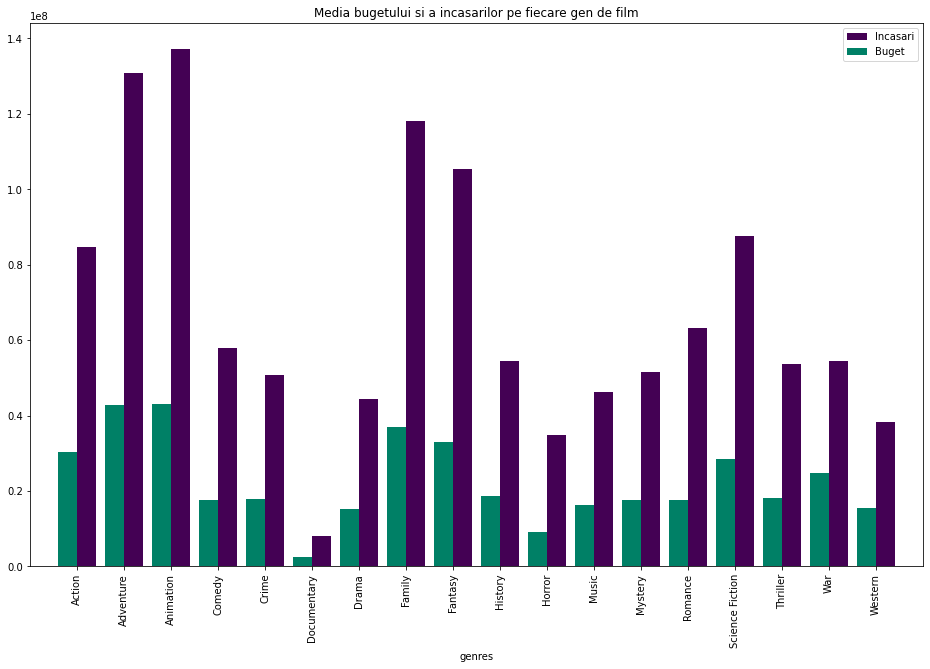

In [39]:
movies.groupby("genres").new_revenue.mean().plot(kind="bar", figsize=(16, 10), label="Revenue", width=0.4, colormap="viridis", 
                                             position=0)
movies.groupby("genres").budget.mean().plot(kind="bar", figsize=(16, 10), label="Budget", 
                                            title="The mean of the revenue and the budget for each genre of the movie", position=1.0, 
                                            width=0.4, colormap="summer")
plt.legend()
plt.xlim(-1, 18)
plt.show()
plt.close()

From this graph, we can see that all the genres made *revenue* over *budget*, and some of them made even double, or triple.

Next, we can separate all these genres into different columns (one for each **genre**), for using them into a *numerical* way in our machine learning model. To do that, we are going to use **dummy variables**, which separates each genre into a different column, giving to these column values of **0 or 1** (if, for example, the movies has as genre *action*, then, on the row of the action column will be **1** as value, and the rest of the columns will have **0** as value on the same row.

In [40]:
dummy_genres = pd.get_dummies(movies["genres"])

In [41]:
dummy_genres

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45402,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45408,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45409,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45412,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Now we can add too these column to our *cleaned* dataframe.

In [42]:
movies_cleaned = pd.concat([movies_cleaned, dummy_genres], axis=1, join="inner")
movies_cleaned.dropna(inplace=True)

In [43]:
movies_cleaned

,new_revenue,budget,is_adult,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,320624299.0,30000000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,320624299.0,65000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,97452156.0,16000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,247436818.0,60000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,58000000.0,58000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45402,2000000.0,2000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45408,2000000.0,2000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45409,2128612.0,800000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45412,3268793.0,2000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### The *original_language* column*
We continue by analysing this column, and first of all, we will take a look at the counting of each *language*.

In [42]:
movies["original_language"]

0        en
1        en
3        en
5        en
6        en
         ..
45402    ru
45408    ru
45409    en
45412    en
45422    ru
Name: original_language, Length: 8164, dtype: object

In [43]:
movies["original_language"].nunique()

51

In [44]:
movies.groupby('original_language').id.count().sort_values()

original_language
af       1
mr       1
lv       1
lo       1
ku       1
fa       1
uk       1
ur       1
sq       1
bg       1
bo       1
bm       1
bs       1
is       2
nb       2
xx       2
ca       2
ar       2
el       2
vi       2
cs       3
sl       3
et       3
id       4
hu       7
tr       8
te       9
ro       9
he      10
th      10
ml      11
sr      11
pl      18
sv      21
no      22
nl      27
pt      28
ta      32
cn      32
da      35
ko      54
fi      60
zh      61
it      72
ja      75
de      77
es     107
hi     124
ru     134
fr     223
en    6847
Name: id, dtype: int64

We can get rid of the movies where the counting of the *language* it's very low, and we keep only the ones that appear at least for **70** times.

In [44]:
movies = movies[(movies["original_language"] == "en") | (movies["original_language"] == "fr") | (movies["original_language"] == "ru") | 
         (movies["original_language"] == "hi") | (movies["original_language"] == "es") | (movies["original_language"] == "de") |
         (movies["original_language"] == "ja") | (movies["original_language"] == "it") | (movies["original_language"] == "it")]

In [45]:
movies.groupby('original_language').id.count().sort_values()

original_language
it      72
ja      75
de      77
es     107
hi     124
ru     134
fr     223
en    6847
Name: id, dtype: int64

We can also make a graph here too, for seeing the rapport of the *budget/revenue* for each *language* of the movies.

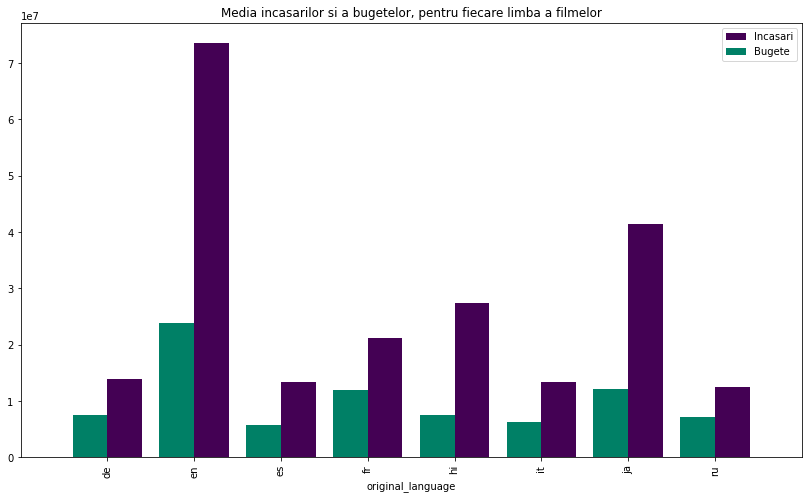

In [47]:
movies.groupby("original_language").new_revenue.mean().plot(kind="bar", figsize=(14, 8), label="Revenue", colormap="viridis", 
                                                        title="The mean of the revenue and budget for each language of the movies", 
                                                        position=0.0, width=0.4)
movies.groupby("original_language").budget.mean().plot(kind="bar", figsize=(14, 8), label="Budget", colormap="summer", 
                                                       position=1.0, width=0.4)
plt.legend()
plt.xlim(-1, 8)
plt.show()
plt.close()

We can see that here too all the movies made *revenue* over *budget*, but from far, the movies in **english** had the highest *revenue*, and the *budget* wasn't so high.

We also transform these languages into numerical values, using the same method(**dummy variables**), and we change the name of each new column, for making them more descriptive.

In [46]:
dummy_languages = pd.get_dummies(movies["original_language"])
dummy_languages

,de,en,es,fr,hi,it,ja,ru
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
45402,0,0,0,0,0,0,0,1
45408,0,0,0,0,0,0,0,1
45409,0,1,0,0,0,0,0,0
45412,0,1,0,0,0,0,0,0


In [47]:
dummy_languages.columns = ["German", "English", "Spanish", "French", "Indian", "Italian", "Japanese", "Russian"]

In [48]:
dummy_languages

,German,English,Spanish,French,Indian,Italian,Japanese,Russian
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
45402,0,0,0,0,0,0,0,1
45408,0,0,0,0,0,0,0,1
45409,0,1,0,0,0,0,0,0
45412,0,1,0,0,0,0,0,0


And now, we add these column to our *cleaned* dataframe.

In [49]:
movies_cleaned = pd.concat([movies_cleaned, dummy_languages], axis=1, join="inner")
movies_cleaned.dropna(inplace=True)

In [50]:
movies_cleaned

,new_revenue,budget,is_adult,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,War,Western,German,English,Spanish,French,Indian,Italian,Japanese,Russian
0,320624299.0,30000000,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,320624299.0,65000000,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,97452156.0,16000000,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,247436818.0,60000000,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,58000000.0,58000000,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45402,2000000.0,2000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45408,2000000.0,2000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45409,2128612.0,800000,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
45412,3268793.0,2000000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### The *runtime* column 
Our analyse continues, and the next column that will be analysed is **runtime**.

In [51]:
movies['runtime'].describe()

count    7656.000000
mean      106.799765
std        26.542140
min         0.000000
25%        93.000000
50%       102.000000
75%       117.000000
max       705.000000
Name: runtime, dtype: float64

We can see that the maximum value is **705**, which is weird, because there is no movie that has such a long runtime, and also we have *0* as the minimum value. Both of them represent **outliers**, which we'll deal with. But first of all, let's see if we have **NaN** values.

In [54]:
movies['runtime'].isnull().sum()

3

These 3 **NaN** values will be replaced with the mean of the column' values.

In [52]:
runtime_mean = int(np.mean(movies["runtime"]))
movies["runtime"] = movies["runtime"].fillna(runtime_mean)

We'll replace with the mean of the column' values too the values that are **0**.

In [53]:
movies["runtime"] = movies.runtime.apply(lambda row: row if row > 0 else runtime_mean)
movies["runtime"].describe()

count    7659.000000
mean      107.297689
std        25.501851
min         4.000000
25%        93.000000
50%       102.000000
75%       117.000000
max       705.000000
Name: runtime, dtype: float64

Let's plot a histogram.

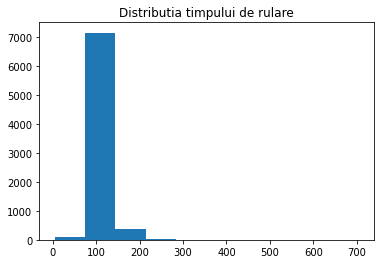

In [54]:
plt.hist(movies["runtime"])
plt.title("The distribution of the runtimes")
plt.show()
plt.close()

The distribution doesn't look good, because we still have **outliers**. For dealing with these **outliers**, we'll make a *boxplot*, and we'll apply here too the *interquartile range method*.

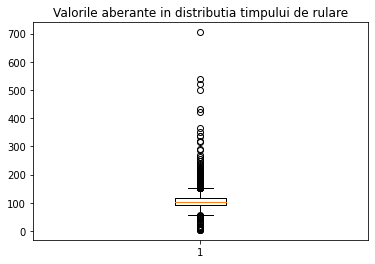

In [55]:
plt.boxplot(movies["runtime"][movies['runtime'].notna()])
plt.title("Outliers in the runtimes distribution")
plt.show()
plt.close()

In [56]:
q1 = np.percentile(movies["runtime"], 25)
q3 = np.percentile(movies["runtime"], 75)
iqr = q3 - q1
q_min, q_max =int(q1 - 3*iqr), int(q3 + 3*iqr)

In [57]:
q_min, q_max

(21, 189)

De regula, cand vrem sa obtinem un interval mai mic de valori, inmultim in formula *intervalului intercual* cu *1.5*, si cand vrem un interval mai mare, cu *3.0*.

Normally, when we want to get a smaller range of values, we multiply in the interquartile range formula by *1.5*, and when we want a wider range of values, we multiply by *3.0*.

In [58]:
movies["runtime"] = movies["runtime"].clip(q_min, q_max)

Let's plot again a histogram, to see if there is an improvement.

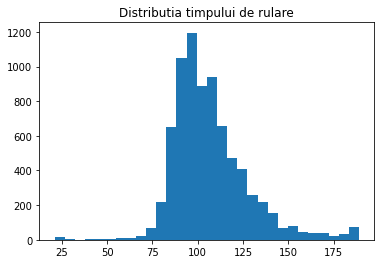

In [63]:
plt.hist(movies["runtime"], bins=30)
plt.title("The distribution of the runtimes")
plt.show()
plt.close()

Next, we can create a new column, called *is_longer*, where we'll put **1** for the movies that are longer, and **0**, for the movies thar are shorter. Let's consider that a long movie must have at least two hours(120 minutes). Then, we'll use this new column, to see the rapport between this column and the *budget* and *revenue* columns.

In [59]:
movies["is_longer"] = movies.runtime.apply(lambda row: 1 if row >= 120 else 0)

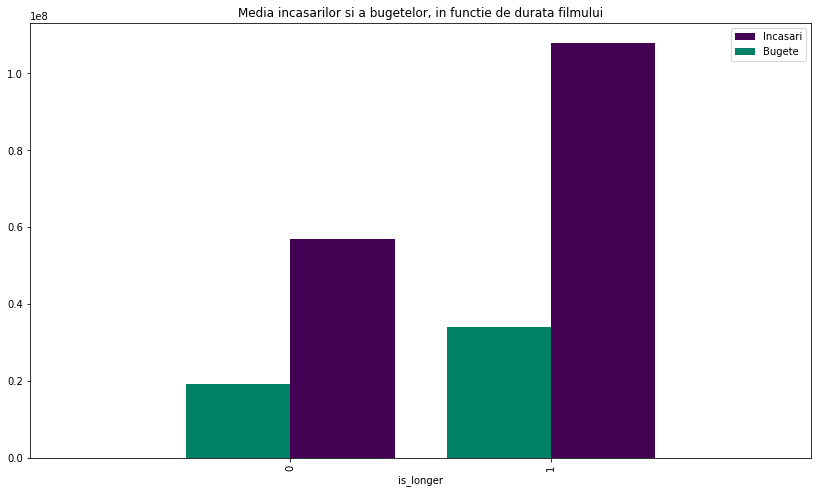

In [60]:
movies.groupby("is_longer").new_revenue.mean().plot(kind="bar", figsize=(14, 8), label="Revenue", colormap="viridis", width=0.4, 
                                            title="The mean of the budget and revenue in relation to the runtime of the movies",
                                                    position=0)
movies.groupby("is_longer").budget.mean().plot(kind="bar", figsize=(14, 8), label="Budget", colormap="summer", width=0.4,
                                              position=1)
plt.legend()
plt.xlim(-1, 2)
plt.show()
plt.close()

We can observe that the both types of movies made *revenue* over *budget*, but we can also see that the longer movies are more profitable than the shorter ones, the difference between their budgets being small.

Now can see if there is some sort of linearity between *revenue* and *runtime*, but also between *budget* and *runtime*.

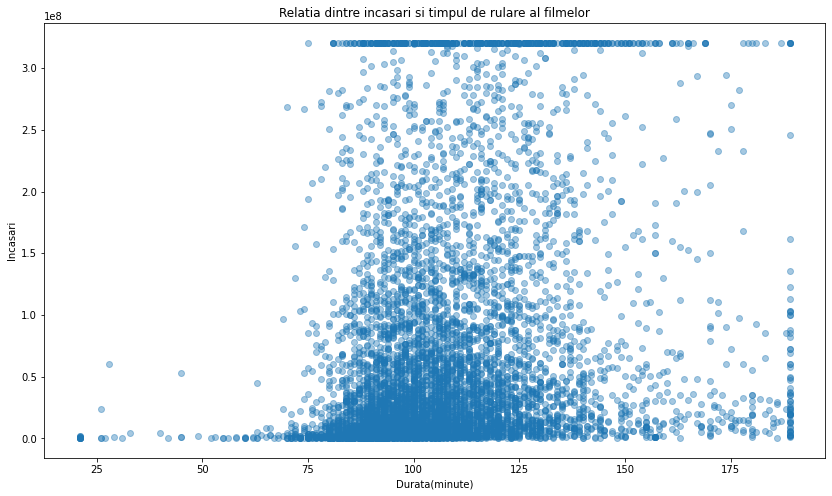

In [66]:
plt.figure(figsize=(14, 8))
plt.scatter(movies["runtime"], movies["new_revenue"], alpha=0.4)
plt.xlabel("Runtime(minutes)")
plt.ylabel("Revenue")
plt.title("The relationship between revenue and runtime")
plt.show()
plt.close()

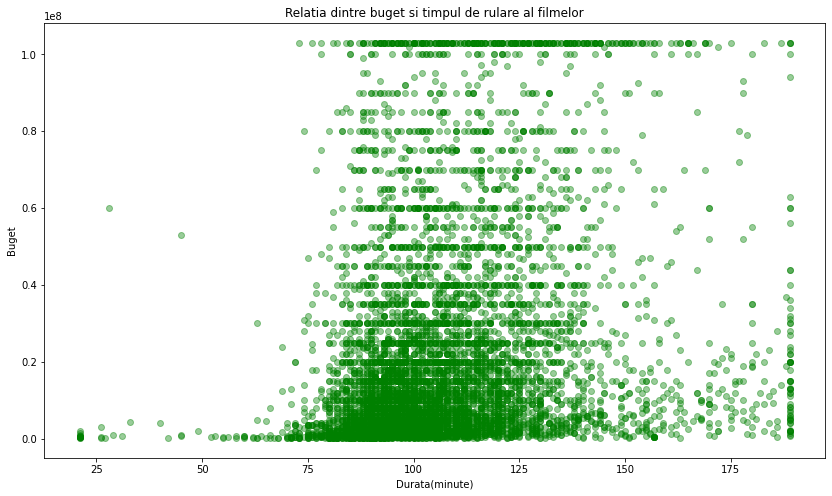

In [67]:
plt.figure(figsize=(14, 8))
plt.scatter(movies["runtime"], movies["budget"], alpha=0.4, color="green")
plt.xlabel("Runtime(minutes)")
plt.ylabel("Budget")
plt.title("The relationship between budget and runtime")
plt.show()
plt.close()

As we can see, there is some sort of linearity between *runtime* and the two columns(*revenue* and *budget*). But it's very small.

Now we add this column too to our *cleaned* dataframe.

In [61]:
movies_cleaned["runtime"] = movies["runtime"]

In [62]:
movies_cleaned

,new_revenue,budget,is_adult,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,Western,German,English,Spanish,French,Indian,Italian,Japanese,Russian,runtime
0,320624299.0,30000000,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,81.0
1,320624299.0,65000000,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,104.0
3,97452156.0,16000000,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,127.0
5,247436818.0,60000000,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,170.0
6,58000000.0,58000000,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45402,2000000.0,2000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,89.0
45408,2000000.0,2000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,100.0
45409,2128612.0,800000,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,100.0
45412,3268793.0,2000000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,107.0


### The *vote_average* column
The next column, being the last one in our analyse, it's **vote_average**.

In [63]:
movies["vote_average"]

0        7.7
1        6.9
3        6.1
5        7.7
6        6.2
        ... 
45402    3.5
45408    5.0
45409    5.8
45412    4.0
45422    1.0
Name: vote_average, Length: 7659, dtype: float64

It looks like are the ratings of the movies. We can change the name of the column, to make it more descriptive.

In [64]:
movies.rename(columns={"vote_average": "rating"}, inplace=True)

In [65]:
movies["rating"].describe()

count    7659.000000
mean        6.034156
std         1.142987
min         0.000000
25%         5.500000
50%         6.100000
75%         6.800000
max        10.000000
Name: rating, dtype: float64

Let's check first if we have **NaN** values, and in case we have, we'll replace them with the median of the values(we can also use the mean, or the mode, being the value that shows up most often etc.) The median we can see that it's **6.1**. Wecan also see that we have **0** as values(which is weird, because there is no movie that has **0** as its rating).

In [73]:
movies["rating"].isnull().sum()

0

Let's plot a histogram.

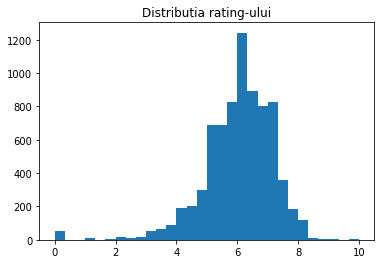

In [66]:
plt.hist(movies["rating"], bins=30)
plt.title("The distribution of the ratings")
plt.show()
plt.close()

The distribution looks to be normal.

Further, we'll replace the values that are below **1**, with the value **1**(because, as I said above, there is no movie with **0** as its rating, and I decided to replace them with the closest value to **0**, which indicates a *real rating*).

In [67]:
movies["rating"] = movies.rating.apply(lambda row: 1 if row <= 1 else row)

Let's plot a histogram again, to see how the distribution has changed.

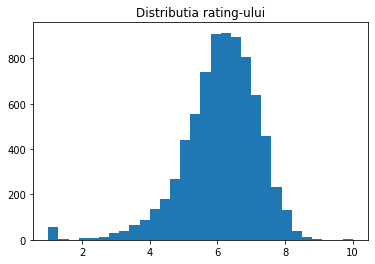

In [68]:
plt.hist(movies["rating"], bins=30)
plt.title("The distribution of the ratings")
plt.show()
plt.close()

We can keep going by creating a new column, called **is_good**, where we'll add **0** for each movie that its rating is less than *6.5*, and **1** for each movie that its rating is bigger or equal than *6.5*, for using this column later at creating a new graph, for seeing the rapport between this new column and the *budget/revenue*. I've considered *6.5* being a good 
threshold. But we can change it into anyvalue we want, if the machine learning model doesn't provide the expected information.

In [69]:
movies["is_good"] = movies.rating.apply(lambda row: 1 if row >= 6.5 else 0)

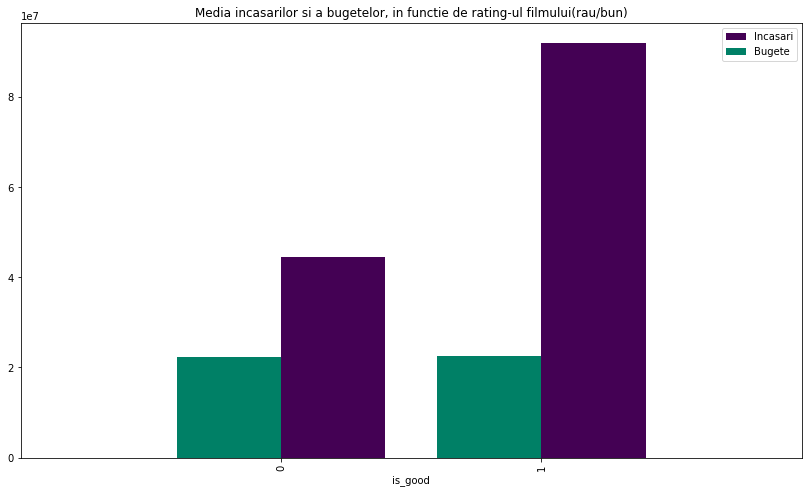

In [70]:
movies.groupby("is_good").revenue.mean().plot(kind="bar", figsize=(14, 8), label="Revenue", colormap="viridis", position=0,
                            title="The mean of the budget and revenue, according to the rating of the movies(1-good/0-bad)",
                                             width=0.4)
movies.groupby("is_good").budget.mean().plot(kind="bar", figsize=(14, 8), label="Budget", colormap="summer", position=1,
                                             width=0.4)
plt.legend()
plt.xlim(-1, 2)
plt.show()
plt.close()

From the graph we can see that the *budget* difference between the two types of movies(good/bad) isn't so high, the budget being almost equal, but the *revenue* being higher at the *good* movies.

Now we can add this column too to our *cleaned* dataframe.

In [71]:
movies_cleaned["rating"] = movies["rating"]

### Our final dataframe

In [80]:
movies_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7659 entries, 0 to 45422
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   new_revenue      7659 non-null   float64
 1   budget           7659 non-null   int64  
 2   is_adult         7659 non-null   int64  
 3   Action           7659 non-null   uint8  
 4   Adventure        7659 non-null   uint8  
 5   Animation        7659 non-null   uint8  
 6   Comedy           7659 non-null   uint8  
 7   Crime            7659 non-null   uint8  
 8   Documentary      7659 non-null   uint8  
 9   Drama            7659 non-null   uint8  
 10  Family           7659 non-null   uint8  
 11  Fantasy          7659 non-null   uint8  
 12  History          7659 non-null   uint8  
 13  Horror           7659 non-null   uint8  
 14  Music            7659 non-null   uint8  
 15  Mystery          7659 non-null   uint8  
 16  Romance          7659 non-null   uint8  
 17  Science Ficti

In [72]:
movies_cleaned = movies_cleaned.reset_index()
movies_cleaned.drop('index', axis=1, inplace=True)

Here I reseted the indexes.

In [73]:
movies_cleaned

,new_revenue,budget,is_adult,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,German,English,Spanish,French,Indian,Italian,Japanese,Russian,runtime,rating
0,320624299.0,30000000,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,81.0,7.7
1,320624299.0,65000000,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,104.0,6.9
2,97452156.0,16000000,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,127.0,6.1
3,247436818.0,60000000,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,170.0,7.7
4,58000000.0,58000000,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,127.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7654,2000000.0,2000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,89.0,3.5
7655,2000000.0,2000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,100.0,5.0
7656,2128612.0,800000,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,100.0,5.8
7657,3268793.0,2000000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,107.0,4.0


### Machine learning model that I used - Multiple Linear Regression

The above dataframe is the one that we'll use to our machine learning model.

The used model will be **Multiple Linear Regression**, which uses all the variables from our dataframe to make predictions of the *revenue* of a movie.

The first step is to separate the data in:
- independent variables(the ones that we use for making the predictions) - **x**
- dependent variable(the one on which the prediction will be made) - **y**

In [74]:
x = movies_cleaned.iloc[:, 1:]
y = movies["new_revenue"]

The next step is to split the data in:
- **training data** - which we'll use to *train* the model
- **test data** - which we'll use to make the prediction
- **vaidation data** - which we'll use to compute the accuracy of our model

In [75]:
X_train, X_test, y_train, y_validate = train_test_split(x, y, train_size=0.9, test_size=0.1, random_state=1236)

In [76]:
X_train

,budget,is_adult,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,German,English,Spanish,French,Indian,Italian,Japanese,Russian,runtime,rating
6638,2000000,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,95.0,5.2
2631,9500000,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,124.0,7.0
1479,20000000,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,107.0,7.6
1593,15000000,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,130.0,6.5
256,19000000,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,119.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2000000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,87.0,6.7
6684,5000000,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,110.0,7.3
5969,600000,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,60.0,1.0
4427,12000000,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,100.0,5.5


In [77]:
y_train

31711      2000000.0
6892      24060247.0
3378      81276872.0
3634      15000000.0
586      291742922.0
            ...     
2251       6100000.0
32342      5000000.0
24094       600000.0
14501     16884663.0
21878    207000000.0
Name: new_revenue, Length: 6893, dtype: float64

The next step is creating our **multiple linear regression** model, and filling it with **training data**(*X_train* and *y_train*).

In [78]:
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train, y_train)

LinearRegression()

Now making the predictions on the **test data** follow(*X_test*).

In [79]:
revenue_predict = multiple_linear_regression.predict(X_test)

We can plot a graph, to see the difference between the predicted values, and the real ones.

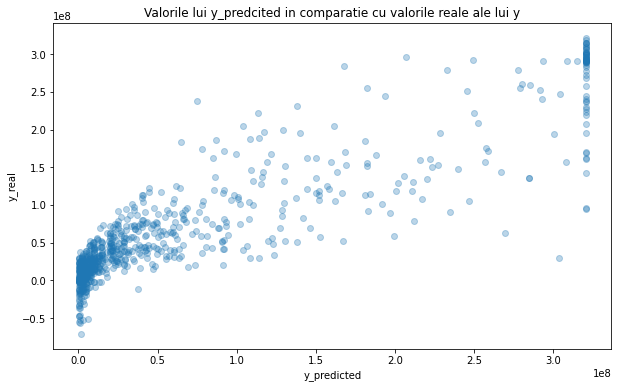

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(y_validate, revenue_predict, alpha=0.3)
plt.plot()
plt.xlabel("y_predicted")
plt.ylabel("y_real")
plt.title("The values of y_predcited comparing to the real values of y")
plt.show()
plt.close()

We can test the accuracy of our model.

In [81]:
round(multiple_linear_regression.score(X_test, y_validate), 2)

0.8

Here, I ran a mini-algorithm, in which I searched a *random_state* where the accuracy of our model is the highest.

In [176]:
x = movies_cleaned.iloc[:, 1:]
y = movies_cleaned["new_revenue"]
accuracy = []
for i in range(1, 2000):
    X_train, X_test, y_train, y_validate = train_test_split(x, y, train_size=0.9, test_size=0.1, random_state=i)
    multiple_linear_regression = LinearRegression()
    multiple_linear_regression.fit(X_train, y_train)
    revenue_predict = multiple_linear_regression.predict(X_test)
    accuracy.append(multiple_linear_regression.score(X_test, y_validate))

In [177]:
a = max(accuracy)
best = accuracy.index(a) + 1
best

1236

In [179]:
round(max(accuracy), 2)

0.8

And I've found that **1236** is the best *random_state*, where the accuracy is **80%**.

### Testing our model on real data

In [82]:
from tkinter import*
from tkinter import messagebox

window = Tk()

# ADULT
def options_adult():
    if adult_inside_value.get() == "Yes":
        adult = 1
    elif adult_inside_value.get() == "No":
        adult = 0
    else:
        adult = False
    return adult


adult_label = Label(text="Is it the movie 18+ as age?", font=("Times New Roman", 16, "bold"))
adult_label.place(x=280, y=30)
adult_inside_value = StringVar()
adult_inside_value.set( "Choose an option")
adult_answer_options = ["Yes", "No"]
adult_options = OptionMenu(window, adult_inside_value, *adult_answer_options)
adult_options.place(x=535, y=27)
adult_options.config(relief="solid", font=("Times New Roman", 12, "bold"), bg="#66fadf", activebackground="#cdf7e8")

# BUDGET
def budget_button1_color1(event): # It's the "choose between an range" button  
    budget_select.config(bg="#cdf7e8")

def budget_button1_color2(event): 
    budget_select.config(bg="#66fadf")

def budget_button2_color1(event): # It's the "Type in the value" button
    budget_typein.config(bg="#cdf7e8")

def budget_button2_color2(event):
    budget_typein.config(bg="#66fadf")

check_budget_scale = False
def select_budget():
    global check_budget_scale
    budget_typein.destroy()
    budget_label2.destroy()
    budget_select.destroy()
    check_budget_scale = True
    scale_budget.place(x=290, y=65)

def budget_entry_check(input_budget):
    if input_budget.isdigit():
        if int(input_budget) > 60000000:
            budget_label3_info.config(text="The budget cannot exceed\n60000000 dollars!", fg="red")
            budget_label3_info.place(x=680, y=78)
            return True
        elif int(input_budget) < 50000:
            budget_label3_info.config(text="The budget can't be\nlower than 50000 dollars!", fg="red")
            budget_label3_info.place(x=680, y=78)
            return True
        else:
            budget_label3_info.config(fg="green")
            budget_label3_info.place_forget()
            return True
    elif not input_budget.isdigit() and len(input_budget) > 0:
        budget_label3_info.config(text="Only numbers(positive) allowed!", fg="red")
        budget_label3_info.place(x=680, y=85)
        return False
    else:
        budget_label3_info.config(fg="red")
        budget_label3_info.place_forget()
        return True

new_width = 470
new_x = 60
def typein_budget():
    global new_width, new_x
    if new_width == 225:
        new_width = 14
        new_x = 537
        button_budget_typein_animation()
        return True
    elif new_width > 225:
        new_width -= 1
        new_x += 1
    budget_frame.config(width=new_width)
    budget_frame.place(x=new_x)
    budget_frame.after(1, typein_budget)

def button_budget_typein_animation():
    global new_width, new_x
    if new_width == 1 or new_x == 580:
        new_width -= 1
        new_x += 11
        budget_typein.config(width=new_width)
        budget_typein.place(x=new_x)
        budget_typein.destroy()
        scale_budget.destroy()
        budget_entry.focus_set()
        return True
    elif new_width > 1 or new_x < 580:
        new_width -= 1
        new_x += 11
    budget_typein.config(width=new_width)
    budget_typein.place(x=new_x)
    budget_typein.after(5, button_budget_typein_animation)

budget_frame = Frame(width=470, height=33)
budget_frame.place(x=60, y=80)
budget_label = Label(budget_frame, text="The budget of the movie", font=("Times New Roman", 16, "bold"))
budget_label.place(x=1, y=1)
budget_label2 = Label(budget_frame, text="or", font=("Times New Roman", 16, "bold"))
budget_label2.place(x=436, y=1)
budget_select = Button(budget_frame, text="Choose between an interval", font=("Times New Roman", 12, "bold"), relief="solid", bg="#66fadf",
                       command=lambda: select_budget())
budget_select.place(x=226, y=0)
budget_select.bind("<Enter>", budget_button1_color1)
budget_select.bind("<Leave>", budget_button1_color2)
budget_entry = Entry(font=("Times New Roman", 14, "bold"), width=13, relief="solid")
budget_entry.place(x=537, y=83)
budget_entry_reg = window.register(budget_entry_check)
budget_entry.config(validate="key", validatecommand=(budget_entry_reg, "%P"))
budget_typein = Button(window, text="Type in the value", font=("Times New Roman", 12, "bold"), relief="solid", bg="#66fadf", 
                       command=lambda: typein_budget(), width=14)
budget_typein.place(x=537, y=80)
budget_typein.bind("<Enter>", budget_button2_color1)
budget_typein.bind("<Leave>", budget_button2_color2)
budget_label3_info = Label(font=("Times New Roman", 8, "bold"), fg="red")
scale_budget = Scale(orient="horizontal", length=590, from_=50000, to=60000000, width=18)

# GENRES
def option_genres():
    if genres_inside_value.get() == "Action":
        gen = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif genres_inside_value.get() == "Adventure":
        gen = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif genres_inside_value.get() == "Animation":
        gen = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif genres_inside_value.get() == "Comedy":
        gen = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif genres_inside_value.get() == "Crime":
        gen = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif genres_inside_value.get() == "Documentary":
        gen = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif genres_inside_value.get() == "Drama":
        gen = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif genres_inside_value.get() == "Family":
        gen = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif genres_inside_value.get() == "Fantasy":
        gen = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif genres_inside_value.get() == "History":
        gen = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    elif genres_inside_value.get() == "Horror":
        gen = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    elif genres_inside_value.get() == "Music":
        gen = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    elif genres_inside_value.get() == "Mystery":
        gen = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
    elif genres_inside_value.get() == "Romance":
        gen = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
    elif genres_inside_value.get() == "Science-Fiction":
        gen = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
    elif genres_inside_value.get() == "Thriller":
        gen = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
    elif genres_inside_value.get() == "War":
        gen = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    elif genres_inside_value.get() == "Western":
        gen = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
    else:
        gen = False
    return gen

genres_label = Label(text="The genre of the movie", font=("Times New Roman", 16, "bold"))
genres_label.place(x=315, y=130)
genres_inside_value = StringVar()
genres_inside_value.set( "Choose an option")
genres_answer_options = ["Action", "Adventure", "Animation", "Comedy", "Crime", "Documentary", "Drama", "Family",
                         "Fantasy", "History", "Horror", "Music", "Mystery", "Romance", "Science-Fiction", "Thriller",
                         "War", "Western"]
genres_options = OptionMenu(window, genres_inside_value, *genres_answer_options)
genres_options.place(x=535, y=127)
genres_options.config(relief="solid", font=("Times New Roman", 12, "bold"), bg="#66fadf", activebackground="#cdf7e8")

# LANGUAGES
def option_languages():
    if languages_inside_value.get() == "German":
        limba = [1, 0, 0, 0, 0, 0, 0, 0]
    elif languages_inside_value.get() == "English":
        limba = [0, 1, 0, 0, 0, 0, 0, 0]
    elif languages_inside_value.get() == "Spanish":
        limba = [0, 0, 1, 0, 0, 0, 0, 0]
    elif languages_inside_value.get() == "French":
        limba = [0, 0, 0, 1, 0, 0, 0, 0]
    elif languages_inside_value.get() == "Indian":
        limba = [0, 0, 0, 0, 1, 0, 0, 0]
    elif languages_inside_value.get() == "Italian":
        limba = [0, 0, 0, 0, 0, 1, 0, 0]
    elif languages_inside_value.get() == "Japanese":
        limba = [0, 0, 0, 0, 0, 0, 1, 0]
    elif languages_inside_value.get() == "Russian":
        limba = [0, 0, 0, 0, 0, 0, 0, 1]
    else:
        limba = False
    return limba

languages_label = Label(text="The language of the movie", font=("Times New Roman", 16, "bold"))
languages_label.place(x=280, y=180)
languages_inside_value = StringVar()
languages_inside_value.set( "Choose an option")
languages_answer_options = ["German", "English", "Spanish", "French", "Indian", "Italian", "Japanese", "Russian"]
languages_options = OptionMenu(window, languages_inside_value, *languages_answer_options)
languages_options.place(x=535, y=177)
languages_options.config(relief="solid", font=("Times New Roman", 12, "bold"), bg="#66fadf", activebackground="#cdf7e8")

# RUNTIME
def runtime_button1_color1(event): # It's the "choose between an range" button 
    runtime_select.config(bg="#cdf7e8")

def runtime_button1_color2(event): 
    runtime_select.config(bg="#66fadf")

def runtime_button2_color1(event): # It's the "Type in the value" button
    runtime_typein.config(bg="#cdf7e8")

def runtime_button2_color2(event):
    runtime_typein.config(bg="#66fadf")

check_runtime_scale = False
def select_runtime():
    global check_runtime_scale
    runtime_typein.destroy()
    runtime_label2.destroy()
    runtime_select.destroy()
    check_runtime_scale = True
    scale_runtime.place(x=290, y=215)

def runtime_entry_check(input_runtime):
    if input_runtime.isdigit():
        if int(input_runtime) > 250:
            runtime_label3_info.config(text="The runtime cannot exceed\n250 minutes!", fg="red")
            runtime_label3_info.place(x=680, y=228)
            return True
        elif int(input_runtime) < 30:
            runtime_label3_info.config(text="The runtime can't be\nlower than 30 minutes!", fg="red")
            runtime_label3_info.place(x=680, y=228)
            return True
        else:
            runtime_label3_info.config(fg="green")
            runtime_label3_info.place_forget()
            return True
    elif not input_runtime.isdigit() and len(input_runtime) > 0:
        runtime_label3_info.config(text="Only numbers(positive) allowed!", fg="red")
        runtime_label3_info.place(x=680, y=235)
        return False
    else:
        runtime_label3_info.config(fg="red")
        runtime_label3_info.place_forget()
        return True

new_width2 = 490
new_x2 = 40
def typein_runtime():
    global new_width2, new_x2
    if new_width2 == 250:
        new_width2 = 14
        new_x2 = 537
        button_runtime_typein_animation()
        return True
    elif new_width2 > 250:
        new_width2 -= 1
        new_x2 += 1
    runtime_frame.config(width=new_width2)
    runtime_frame.place(x=new_x2)
    runtime_frame.after(1, typein_runtime)

def button_runtime_typein_animation():
    global new_width2, new_x2
    if new_width2 == 1 or new_x2 == 680:
        new_width2 -= 1
        new_x2 += 11
        runtime_typein.config(width=new_width2)
        runtime_typein.place(x=new_x2)
        runtime_typein.destroy()
        scale_runtime.destroy()
        runtime_entry.focus_set()
        return True
    elif new_width2 > 1 or new_x2 < 680:
        new_width2 -= 1
        new_x2 += 11
    runtime_typein.config(width=new_width2)
    runtime_typein.place(x=new_x2)
    runtime_typein.after(5, button_runtime_typein_animation)

runtime_frame = Frame(width=490, height=33)
runtime_frame.place(x=40, y=230)
runtime_label = Label(runtime_frame, text="The runtime of the movie", font=("Times New Roman", 16, "bold"))
runtime_label.place(x=15, y=1)
runtime_label2 = Label(runtime_frame, text="or", font=("Times New Roman", 16, "bold"))
runtime_label2.place(x=460, y=1)
runtime_select = Button(runtime_frame, text="Choose between an interval", font=("Times New Roman", 12, "bold"), relief="solid", bg="#66fadf",
                        command=lambda: select_runtime())
runtime_select.place(x=250, y=0)
runtime_select.bind("<Enter>", runtime_button1_color1)
runtime_select.bind("<Leave>", runtime_button1_color2)
runtime_entry = Entry(font=("Times New Roman", 14, "bold"), width=13, relief="solid")
runtime_entry.place(x=537, y=233)
runtime_typein = Button(window, text="Type in the value", font=("Times New Roman", 12, "bold"), relief="solid", bg="#66fadf", width=14,
                        command=lambda: typein_runtime())
runtime_typein.place(x=537, y=230)
runtime_typein.bind("<Enter>", runtime_button2_color1)
runtime_typein.bind("<Leave>", runtime_button2_color2)
runtime_entry_reg = window.register(runtime_entry_check)
runtime_entry.config(validate="key", validatecommand=(runtime_entry_reg, "%P"))
runtime_label3_info = Label(font=("Times New Roman", 8, "bold"), fg="red")
scale_runtime = Scale(orient="horizontal", length=590, from_=30, to=250, width=18)

# YEAR
def year_button1_color1(event): # It's the "choose between an range" button 
    year_select.config(bg="#cdf7e8")

def year_button1_color2(event): 
    year_select.config(bg="#66fadf")

def year_button2_color1(event): # It's the "Type in the value" button
    year_typein.config(bg="#cdf7e8")

def year_button2_color2(event):
    year_typein.config(bg="#66fadf")

check_year_scale = False
def select_year():
    global check_year_scale
    year_typein.destroy()
    year_label2.destroy()
    year_select.destroy()
    check_year_scale = True
    scale_year.place(x=290, y=265)

def year_entry_check(input_year):
    if input_year.isdigit():
        if int(input_year) > 2050:
            year_label3_info.config(text="The year can't be\nhigher than 2050!", fg="red")
            year_label3_info.place(x=680, y=278)
            return True
        elif int(input_year) < 1950:
            year_label3_info.config(text="The year can't be\nless than 1950!", fg="red")
            year_label3_info.place(x=680, y=278)
            return True
        else:
            year_label3_info.config(fg="green")
            year_label3_info.place_forget()
            return True
    elif not input_year.isdigit() and len(input_year) > 0:
        year_label3_info.config(text="Only numbers(positive) allowed!", fg="red")
        year_label3_info.place(x=680, y=285)
        return False
    else:
        year_label3_info.config(fg="red")
        year_label3_info.place_forget()
        return True

new_width3 = 510
new_x3 = 25
def typein_year():
    global new_width3, new_x3
    if new_width3 == 270:
        new_width3 = 14
        new_x3 = 537
        button_year_typein_animation()
        return True
    elif new_width3 > 270:
        new_width3 -= 1
        new_x3 += 1
    year_frame.config(width=new_width3)
    year_frame.place(x=new_x3)
    year_frame.after(1, typein_year)

def button_year_typein_animation():
    global new_width3, new_x3
    if new_width3 == 1 or new_x3 == 660:
        new_width3 -= 1
        new_x3 += 11
        year_typein.config(width=new_width3)
        year_typein.place(x=new_x3)
        year_typein.destroy()
        scale_year.destroy()
        year_entry.focus_set()
        return True
    elif new_width3 > 1 or new_x3 < 660:
        new_width3 -= 1
        new_x3 += 11
    year_typein.config(width=new_width3)
    year_typein.place(x=new_x3)
    year_typein.after(5, button_year_typein_animation)

year_frame = Frame(width=510, height=33)
year_frame.place(x=25, y=280)
year_label = Label(year_frame, text="The release year of the movie", font=("Times New Roman", 16, "bold"))
year_label.place(x=1, y=1)
year_label2 = Label(year_frame, text="or", font=("Times New Roman", 16, "bold"))
year_label2.place(x=465, y=1)
year_select = Button(year_frame, text="Choose between an range", font=("Times New Roman", 12, "bold"), relief="solid", bg="#66fadf",
                        command=lambda: select_year())
year_select.place(x=275, y=0)
year_select.bind("<Enter>", year_button1_color1)
year_select.bind("<Leave>", year_button1_color2)
year_entry = Entry(font=("Times New Roman", 14, "bold"), width=13, relief="solid")
year_entry.place(x=537, y=283)
year_typein = Button(window, text="Type in the value", font=("Times New Roman", 12, "bold"), relief="solid", bg="#66fadf", width=14,
                        command=lambda: typein_year())
year_typein.place(x=537, y=280)
year_typein.bind("<Enter>", year_button2_color1)
year_typein.bind("<Leave>", year_button2_color2)
year_entry_reg = window.register(year_entry_check)
year_entry.config(validate="key", validatecommand=(year_entry_reg, "%P"))
year_label3_info = Label(font=("Times New Roman", 8, "bold"), fg="red")
scale_year = Scale(orient="horizontal", length=590, from_=1950, to=2050, width=18)

# CHECK THE FEATURES
def rating_revenue_button_color1(event): # The button "Display the probable rating and revenue"
    check_rating_revenue_btn.config(bg="#4c90f5")

def rating_revenue_button_color2(event):
    check_rating_revenue_btn.config(bg="#185fc9")

def check_rating_revenue():
    if (budget_label3_info["fg"] == "red" and check_budget_scale == False) or (runtime_label3_info["fg"] == "red" and check_runtime_scale == False) or \
            (year_label3_info["fg"] == "red" and check_year_scale == False) or adult_inside_value.get() == "Choose an option" or \
            genres_inside_value.get() == "Choose an option" or languages_inside_value.get() == "Choose an option":
        messagebox.showinfo("Info", "It seems you didn't complete all the information, or you completed with invalid information! Try again after you completed correctly!")
    else:
        adult = options_adult()
        gen = option_genres()
        limba = option_languages()
        if check_budget_scale == False:
            buget = int(budget_entry.get())
        elif check_budget_scale == True:
            buget = scale_budget.get()
        if check_runtime_scale == False:
            timp_rulare = int(runtime_entry.get())
        elif check_runtime_scale == True:
            timp_rulare = scale_runtime.get()
        if check_year_scale == False:
            an_lansare = int(year_entry.get())
        elif check_year_scale == True:
            an_lansare = scale_year.get()

        row = [buget]
        for i in range(2):
            if i == 0:
                for j in gen:
                    row.append(j)
            elif i == 1:
                for j in limba:
                    row.append(j)
        row.append(an_lansare)
        row.append(timp_rulare)
        columns = ["budget", "Action", "Adventure", "Animation", "Comedy", "Crime", "Documentary", "Drama", "Family",
                   "Fantasy", "History", "Horror", "Music", "Mystery", "Romance", "Science Fiction", "Thriller",
                   "War", "Western", "German", "English", "Spanish", "French", "Indian", "Italian", "Japanese", "Russian", 
                   "year", "runtime"]
        my_df_test = pd.DataFrame([row], columns=columns)
        my_df_test["budget"] = (my_df_test["budget"] - movies_cleaned2_copy["budget"].min()) / (movies_cleaned2_copy["budget"].max() - movies_cleaned2_copy["budget"].min())
        my_df_test["year"] = (my_df_test["year"] - movies_cleaned2_copy["year"].min()) / (movies_cleaned2_copy["year"].max() - movies_cleaned2_copy["year"].min())
        my_df_test["runtime"] = (my_df_test["runtime"] - movies_cleaned2_copy["runtime"].min()) / (movies_cleaned2_copy["runtime"].max() - movies_cleaned2_copy["runtime"].min())
        rating = regresor.predict(my_df_test)
        rating = round(rating[0], 1)
        rating_display.config(text="The probable rating is " + str(rating) + ".")
        rating_display.place(x=50, y=420)

        row = [buget, adult]
        for i in range(2):
            if i == 0:
                for j in gen:
                    row.append(j)
            elif i == 1:
                for j in limba:
                    row.append(j)
        row.append(timp_rulare)
        row.append(rating)
        columns = ["budget", "is_adult", "Action", "Adventure", "Animation", "Comedy", "Crime", "Documentary", "Drama", "Family",
                   "Fantasy", "History", "Horror", "Music", "Mystery", "Romance", "Science Fiction", "Thriller",
                   "War", "Western", "German", "English", "Spanish", "French", "Indian", "Italian", "Japanese", "Russian", 
                   "runtime", "rating"]
        my_df_test = pd.DataFrame([row], columns=columns)
        profit = multiple_linear_regression.predict(my_df_test)
        profit = int(profit[0])
        profit_percentage = (profit - buget)
        if profit_percentage >= 0:
            profit_percentage = round(profit_percentage / buget * 100, 2)
            revenue_percentage_display.config(fg="green", text="+" + str(profit_percentage) + "%")
        else:
            profit_percentage = -profit_percentage
            profit_percentage = round(profit_percentage / buget * 100, 2)
            revenue_percentage_display.config(fg="red", text="-" + str(profit_percentage) + "%")
        revenue_percentage_display.place(x=480, y=450)
        text = "The estimated revenue is " + str(profit) + " de dolari. =>"
        revenue_display.config(text=text)
        revenue_display.place(x=50, y=450)


check_rating_revenue_btn = Button(text="Compute(rating and revenue probable)", relief="groove", font=("Calibri", 16, "bold"), bg="#185fc9", fg="white",
                   command=lambda: check_rating_revenue())
check_rating_revenue_btn.bind("<Enter>", rating_revenue_button_color1)
check_rating_revenue_btn.bind("<Leave>", rating_revenue_button_color2)
check_rating_revenue_btn.place(x=50, y=350)
rating_display = Label(font=("Times New Roman", 16, "bold"), fg="blue")
revenue_display = Label(font=("Times New Roman", 16, "bold"), fg="#6057fa")
revenue_percentage_display = Label(font=("Times New Roman", 16, "bold"))

window.title("Test Window")
window.geometry("900x500")
window.resizable(False, False)
window.mainloop()